In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [18]:
(x_train, y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [19]:
y_train

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

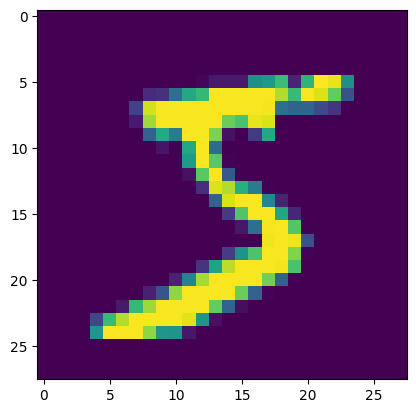

In [20]:
plt.imshow(x_train[0])

In [21]:
x_train,x_test = x_train.reshape(-1,28*28), x_test.reshape(-1,28*28)

In [22]:
x_train,x_test = x_train/255, x_test/255

In [23]:
y_train,y_test = tf.one_hot(y_train,10),tf.one_hot(y_test,10)

In [ ]:
y_train

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], shape=(60000, 10), dtype=float32)>

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28*28]),
    tf.keras.layers.Dense(units=64,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=128,activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=128,activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(units=10,activation=tf.nn.softmax, name='output_layer'),
])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.CategoricalCrossentropy(), metrics=[tf.metrics.CategoricalAccuracy()])

In [30]:
model.fit(x=x_train,y=y_train,batch_size=32,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9131 - loss: 0.2843 - val_categorical_accuracy: 0.9450 - val_loss: 0.1654
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.9579 - loss: 0.1366 - val_categorical_accuracy: 0.9695 - val_loss: 0.0980
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.9691 - loss: 0.1033 - val_categorical_accuracy: 0.9713 - val_loss: 0.0975
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.9733 - loss: 0.0851 - val_categorical_accuracy: 0.9712 - val_loss: 0.1007
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.9776 - loss: 0.0721 - val_categorical_accuracy: 0.9750 - val_loss: 0.0857
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.9807 - loss: 0.0613 - val_categorical_accuracy: 0.9750 - val_loss: 0.0923
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy